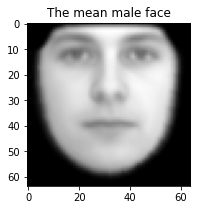

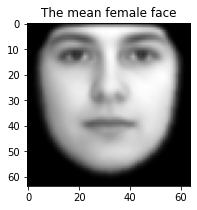

In [2]:
import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
np.set_printoptions(precision=5)

HEIGHT = WIDTH = 64

#Extra Functions
imageToVector = lambda Bitmap: Bitmap.reshape( -1 ).astype( np.float64 )
vectorToImage = lambda Vector: Vector.clip( 0, 255 ).reshape( HEIGHT, WIDTH ).astype( np.uint8 )
renderVector = lambda Vector: plt.imshow( vectorToImage( Vector ), cmap="gray" )
scaleImageIntensities = lambda A: np.round( (A - np.min( A )) / (np.max( A ) -np.min( A )) * 255 ).astype( np.uint8 )

import face_descriptions

F_male = []
F_female = []

face_features = np.array( face_descriptions.face_features_numeric )

nface = 0
for fileName in sorted( face_descriptions.face_features ):
    if fileName not in face_descriptions.image_to_omit:
        if(face_features[nface][1] == 0):
            bitMap = plt.imread( "faces/" + fileName )
            F_male.append( imageToVector( bitMap ))
        if(face_features[nface][1] == 1):
            bitMap = plt.imread( "faces/" + fileName )
            F_female.append( imageToVector( bitMap ))
    nface = nface + 1

F_male = np.array( F_male )
F_female = np.array( F_female )

m_male = np.mean( F_male, axis=0 ) 
m_female = np.mean(F_female, axis=0)

plt.figure( figsize=(3,3) )
plt.title( r"The mean male face" )
renderVector( m_male )

plt.figure( figsize=(3,3) )
plt.title( r"The mean female face" )
renderVector( m_female )


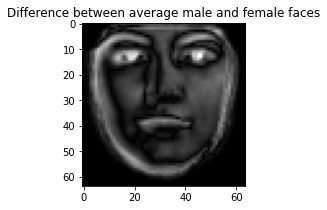

In [4]:
d = scaleImageIntensities(np.absolute(m_male - m_female))

plt.figure( figsize=(3,3) )
plt.title( r"Difference between average male and female faces" )
renderVector( d )

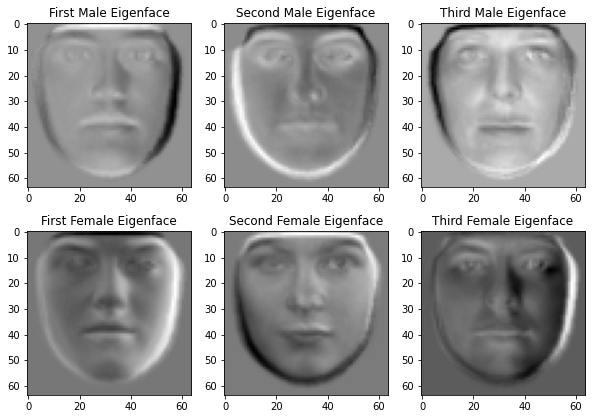

In [8]:
X = F_male - m_male

C = np.cov(X.T)

U, sigma, Vt = spla.svd( C )
Eigenfaces = Vt.T

fig = plt.figure( figsize=(10,7) )
plt.subplot( 231 )
plt.title( "First Male Eigenface" )
renderVector( scaleImageIntensities( Eigenfaces[:,0] ) )
plt.subplot( 232 )
plt.title( "Second Male Eigenface" )
renderVector( scaleImageIntensities( Eigenfaces[:,1] ) )
plt.subplot( 233 )
plt.title( "Third Male Eigenface" )
renderVector( scaleImageIntensities( Eigenfaces[:,2] ) )

X = F_female - m_female

C = np.cov(X.T)

U, sigma, Vt = spla.svd( C )
Eigenfaces = Vt.T

plt.subplot( 234 )
plt.title( "First Female Eigenface" )
renderVector( scaleImageIntensities( Eigenfaces[:,0] ) )
plt.subplot( 235 )
plt.title( "Second Female Eigenface" )
renderVector( scaleImageIntensities( Eigenfaces[:,1] ) )
plt.subplot( 236 )
plt.title( "Third Female Eigenface" )
renderVector( scaleImageIntensities( Eigenfaces[:,2] ) )



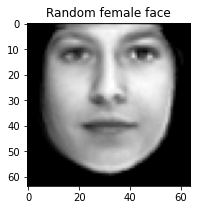

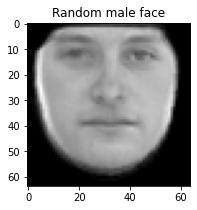

In [34]:
k = 20 


#'Good looking' faces 
#least amount of artifacts due to randomness


X = F_female - m_female
C = np.cov(X.T)

U, sigma, Vt = spla.svd( C )
Eigenfaces = Vt.T

Coeffs = X @ Eigenfaces[:,:k] 
mu = np.mean( Coeffs, axis=0 ) 
std = np.std( Coeffs, ddof=1, axis=0 ) 

newFaceCoeffs = std * np.random.randn( k ) + mu 

newFace = m_female + Eigenfaces[:,:k] @ newFaceCoeffs
plt.figure( figsize=(3,3) )
plt.title( "Random female face" )
renderVector( newFace )



X = F_male - m_male
C = np.cov(X.T)

U, sigma, Vt = spla.svd( C )
Eigenfaces = Vt.T

Coeffs = X @ Eigenfaces[:,:k] 
mu = np.mean( Coeffs, axis=0 ) 
std = np.std( Coeffs, ddof=1, axis=0 ) 

newFaceCoeffs = std * np.random.randn( k ) + mu 

newFace = m_male + Eigenfaces[:,:k] @ newFaceCoeffs
plt.figure( figsize=(3,3) )
plt.title( "Random male face" )
renderVector( newFace )